# Iris Classification 

## Module Importing

In [60]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

## Dataset Importing

In [61]:
df = pd.read_csv("Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [62]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder

# Assuming y contains string labels
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [65]:
label_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [66]:
X = df.drop(columns = ['Id','Species'])
Y = df['Species']
X.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state=42)
print(X_train.shape, y_train.shape)

(120, 4) (120,)


In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building 

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # Input layer with 4 features
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes
])

In [71]:
#Model Compiling
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [72]:
model.fit(X_train, y_train, epochs = 50, batch_size = 16, verbose = 1)

Epoch 1/50
8/8 [==============================] - 0s 2ms/step - loss: 1.5994 - accuracy: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 1.5428 - accuracy: 0.0083
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 1.4878 - accuracy: 0.0167
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 1.4391 - accuracy: 0.0250
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 1.3929 - accuracy: 0.0417
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 1.3481 - accuracy: 0.0750
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 1.3095 - accuracy: 0.1000
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 1.2710 - accuracy: 0.1083
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 1.2338 - accuracy: 0.1500
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 1.1983 - accuracy: 0.1750
Epoch 11/50
8/8 [==================

In [73]:
prediction = model.predict(X_test)
print(prediction[:5])

1/1 [==============================] - 0s 49ms/step
[[0.22633368 0.58007264 0.19359371]
 [0.9348748  0.01311274 0.05201256]
 [0.06264286 0.05231124 0.88504595]
 [0.22717534 0.40478364 0.36804107]
 [0.17832905 0.39998868 0.42168218]]


In [74]:
prediction = np.argmax(prediction , axis = 1)
print(prediction)

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [75]:
print(accuracy_score(y_test, prediction))

0.9333333333333333


In [76]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


Axes(0.125,0.11;0.62x0.77)


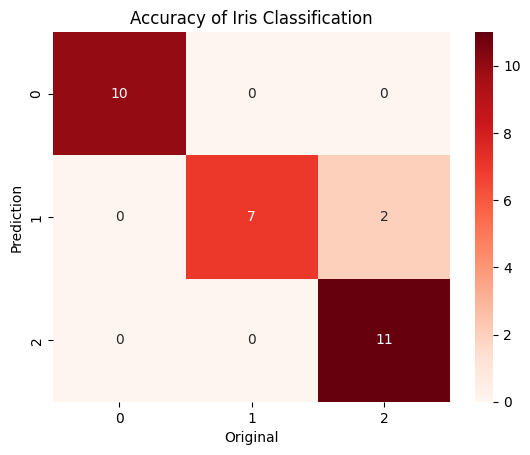

In [77]:
h_map = sns.heatmap(cm, annot = True ,fmt ="d" ,cmap = 'Reds')
h_map.set_title("Accuracy of Iris Classification")
h_map.set_xlabel("Original")
h_map.set_ylabel("Prediction")
print(h_map)


## Testing with Custom Input

In [78]:
import joblib
# joblib.dump(model, "Classification.joblib")
model.save("Classification.keras")